In [1]:
library(Seurat)
library(tidyverse)
library(patchwork)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
obj_neuron = qs::qread('obj_cb_neuron_01')
obj_neuron

An object of class Seurat 
29034 features across 99080 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [3]:
obj = obj_neuron

In [4]:
obj %>% `[[` %>% colnames

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "nCount_RNA_SCOP"                   
 [5] "nFeature_RNA_SCOP"                  "Index.10x_SCOP"                    
 [7] "nCount_HTO_SCOP"                    "nFeature_HTO_SCOP"                 
 [9] "Index.HTO_SCOP"                     "nCount_spliced_SCOP"               
[11] "nFeature_spliced_SCOP"              "nCount_unspliced_SCOP"             
[13] "nFeature_unspliced_SCOP"            "HTO_mcl_maxID_SCOP"                
[15] "HTO_mcl_secondID_SCOP"              "HTO_mcl_margin_SCOP"               
[17] "HTO_mcl_classification_SCOP"        "HTO_mcl_classification.global_SCOP"
[19] "hash.mcl.ID_SCOP"                   "doublet_SCOP"                      
[21] "predicted_dub_std_SCOP"             "predicted_dub_cut_SCOP"            
[23] "barcode_SCOP"                       "Index.10x"                         
[25] "barcode"                            "strain"                            
[27] "treatment"                          "time"                              
[29] "collection_date"                    "isolation_date"                    
[31] "batch"                              "integrated_snn_res.0.5"            
[33] "seurat_clusters"                    "class"                             
[35] "integrated_snn_res.0.8"             "labels_lvl1_mg"                    
[37] "labels_lvl1"                        "prediction.score.max"              
[39] "labels_lvl2"                        "labels_chunk"

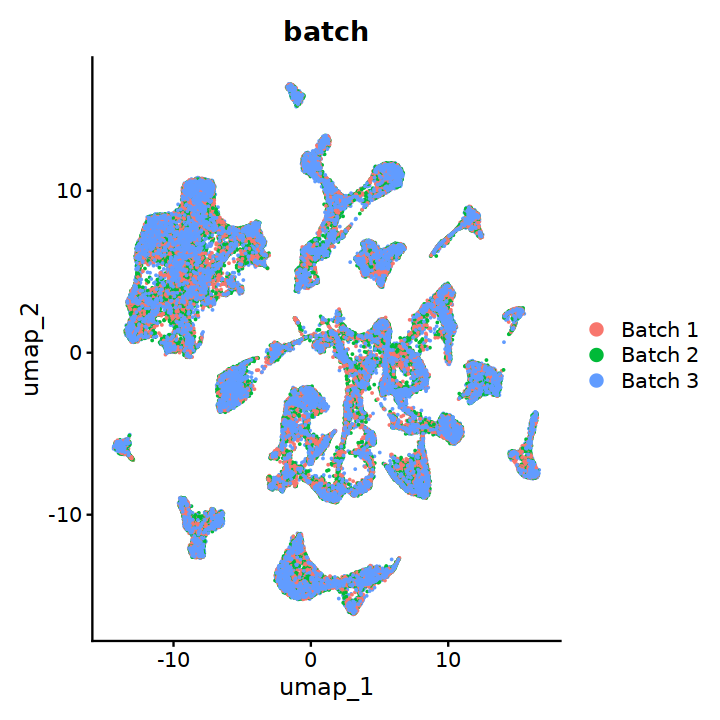

In [5]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', label=F, repel = T)

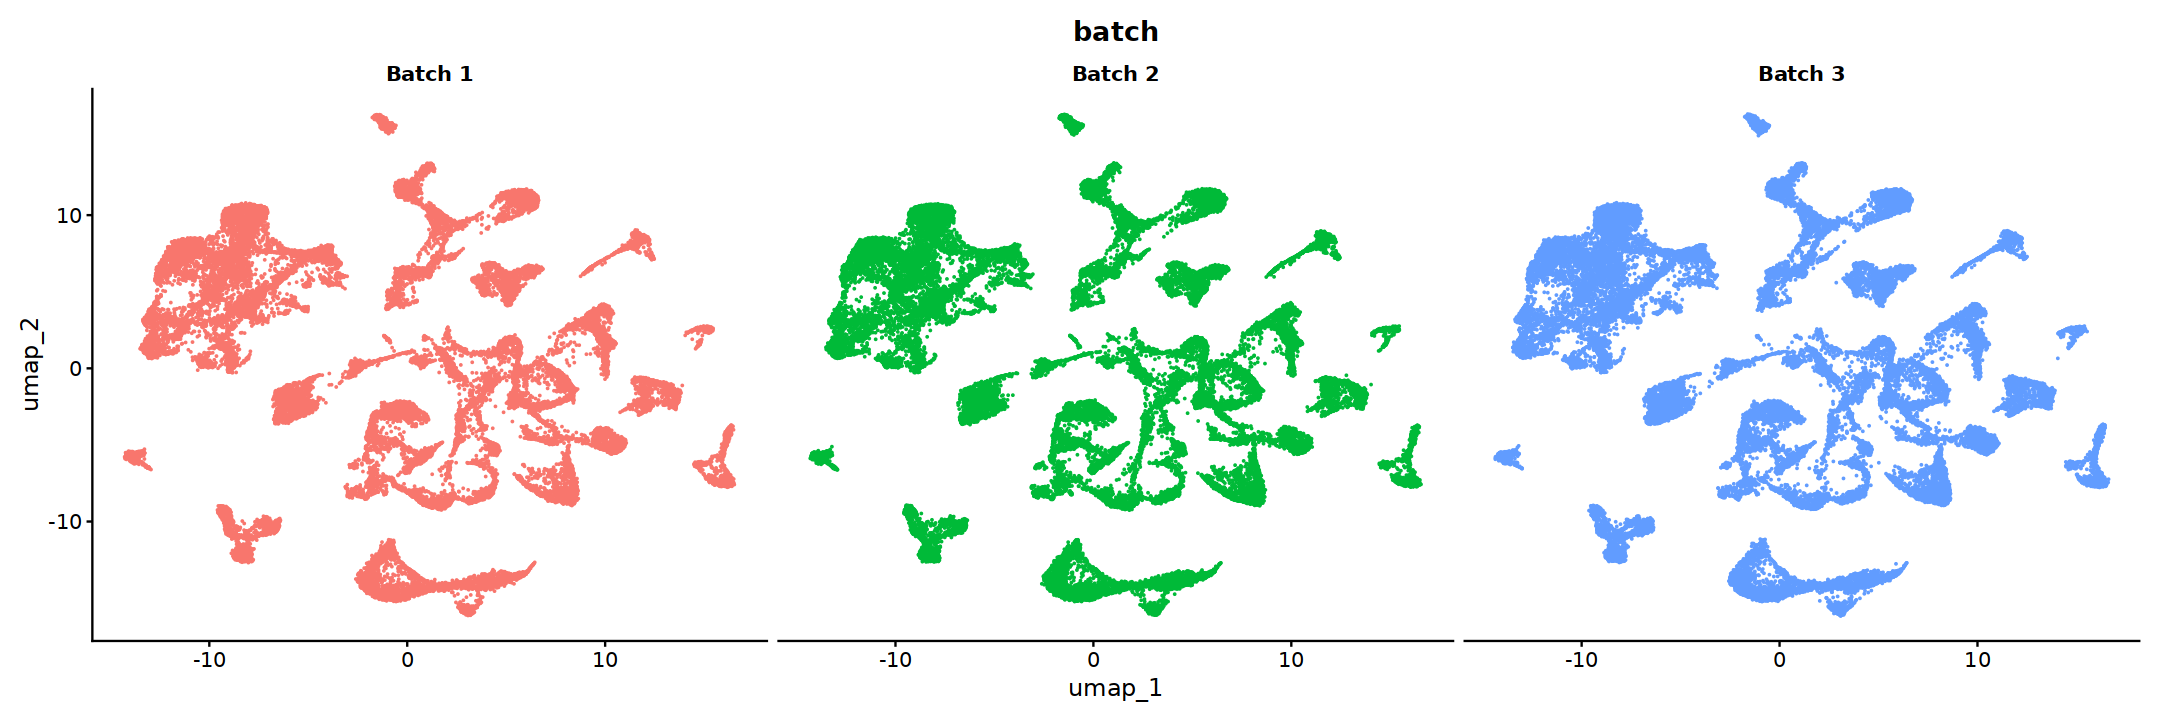

In [6]:
options(repr.plot.width=18, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', split.by='batch', label=F, repel = T) + NoLegend()

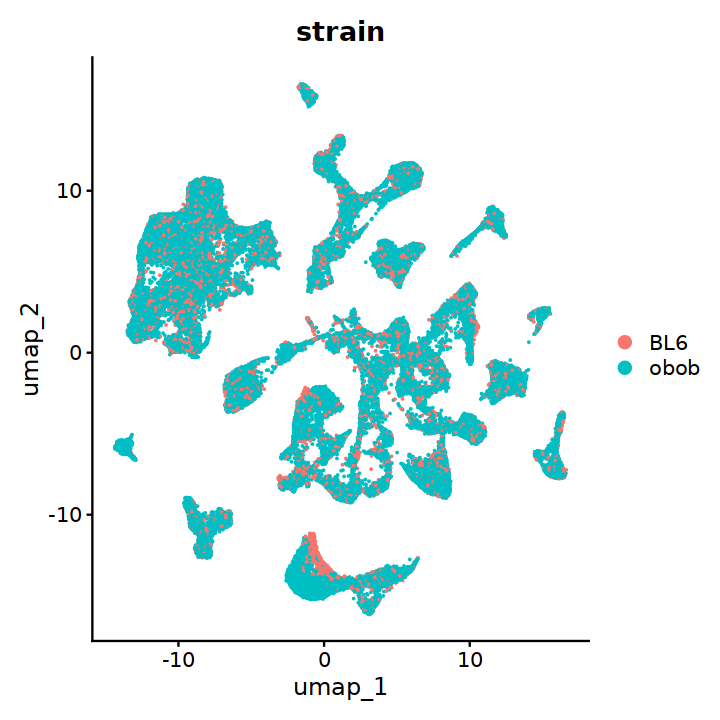

In [7]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='strain', label=F, repel = T)

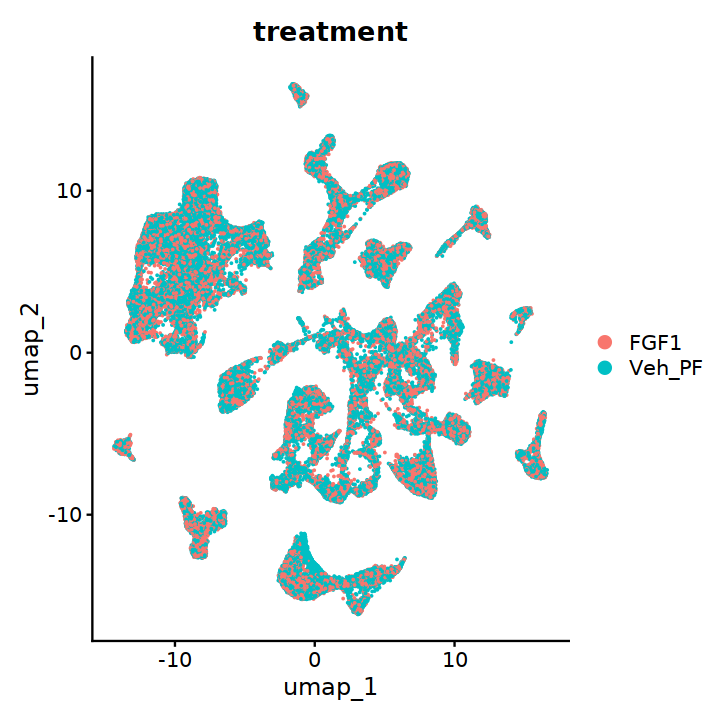

In [8]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='treatment', label=F, repel = T)

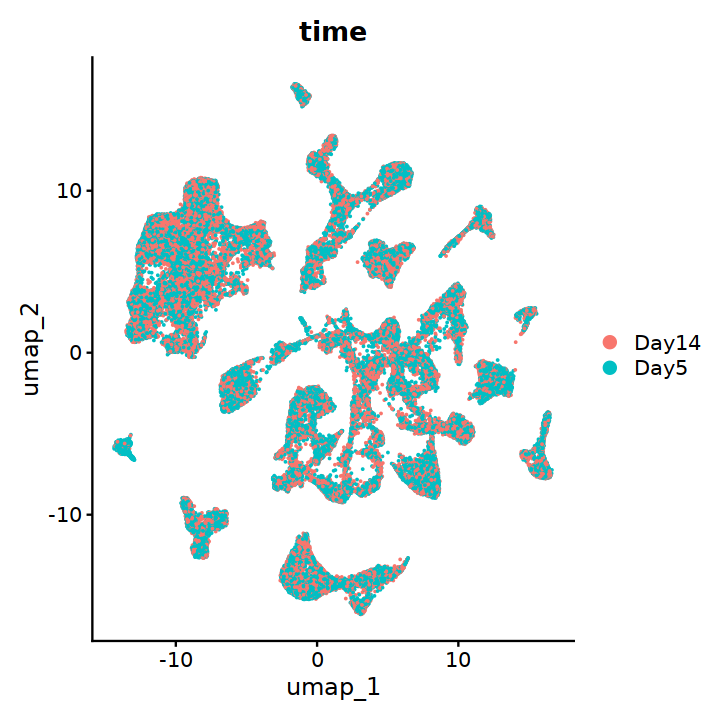

In [9]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='time', label=F, repel = T)

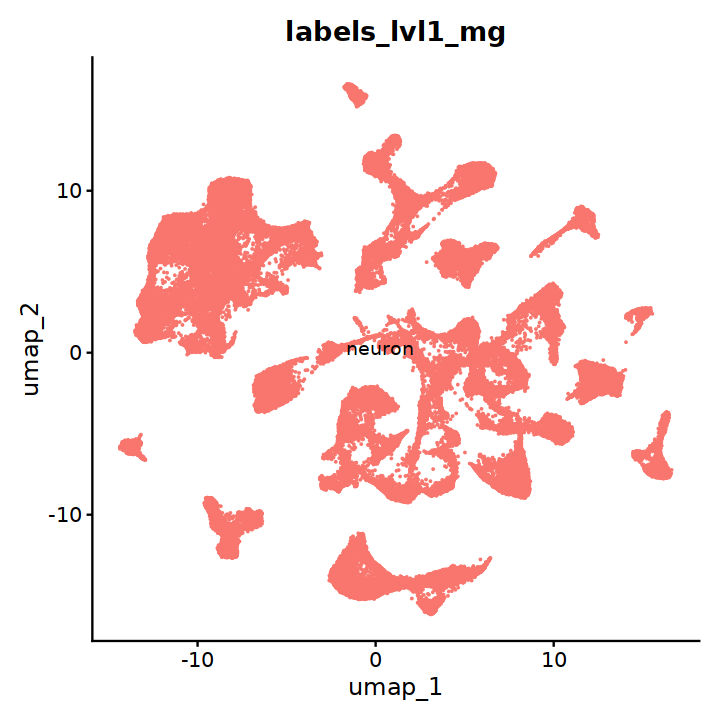

In [10]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='labels_lvl1_mg', label=T) + NoLegend()

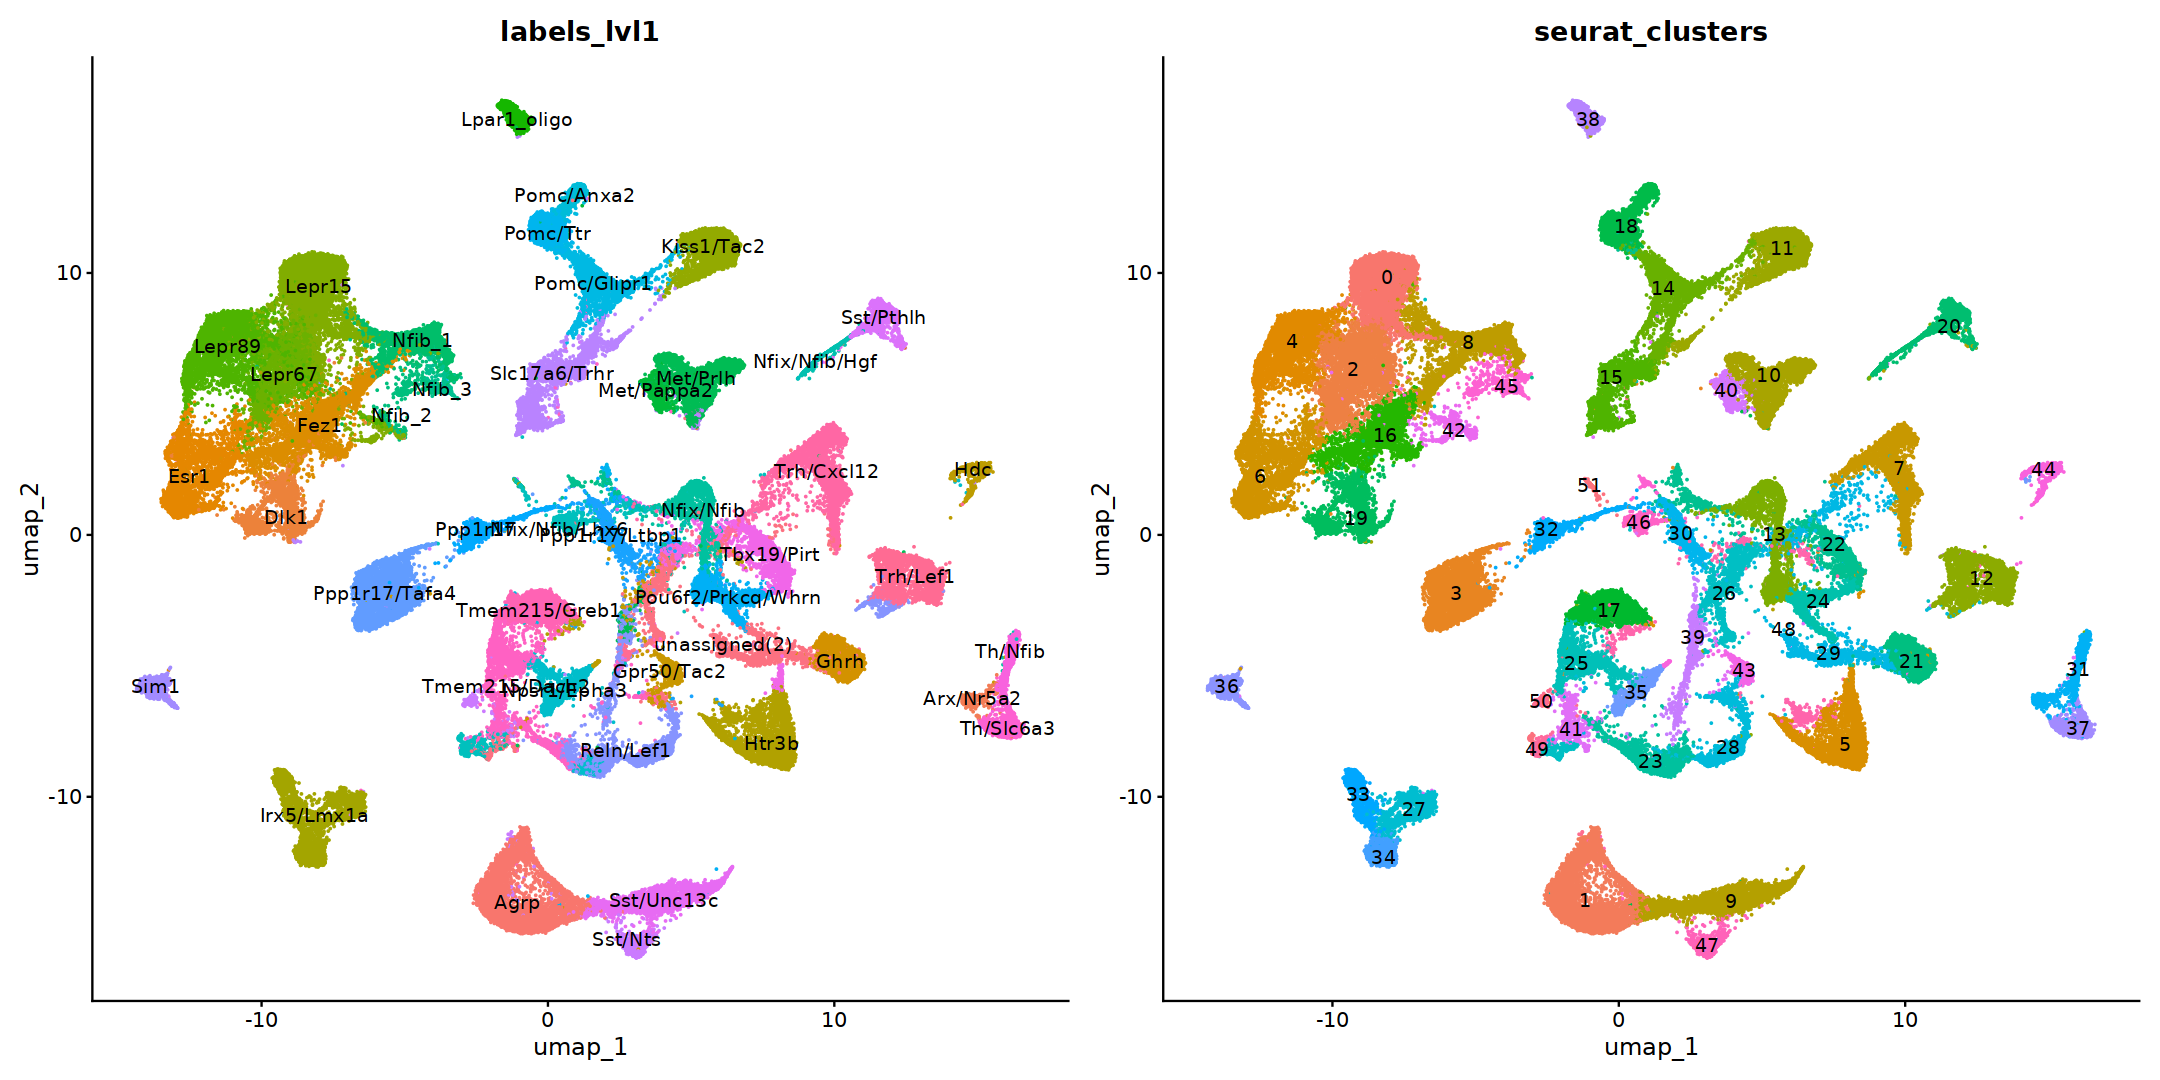

In [11]:
options(repr.plot.width=18, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters

In [12]:
create_freq_df_per_cluster <- function(obj, label_col = 'labels_lvl1') {
    meta = obj %>% `[[`
    meta$labels = meta[[label_col]]
    freq_df <- meta %>%
      group_by(seurat_clusters, labels) %>%
      count() %>%
      group_by(seurat_clusters) %>%
      mutate(freq = n / sum(n)) %>%
      ungroup() %>%
      select(-n) %>%
      spread(key = labels, value = freq, fill = 0)
    freq_df

}

create_freq_df_per_label <- function(obj, label_col = 'labels_lvl1') {
    meta = obj %>% `[[`
    meta$labels = meta[[label_col]]
    freq_df <- meta %>%
      group_by(seurat_clusters, labels) %>%
      count() %>%
      group_by(seurat_clusters) %>%
      mutate(freq = n / sum(n)) %>%
      ungroup() %>%
      select(-n) %>%
      spread(key = seurat_clusters, value = freq, fill = 0)
    freq_df

}



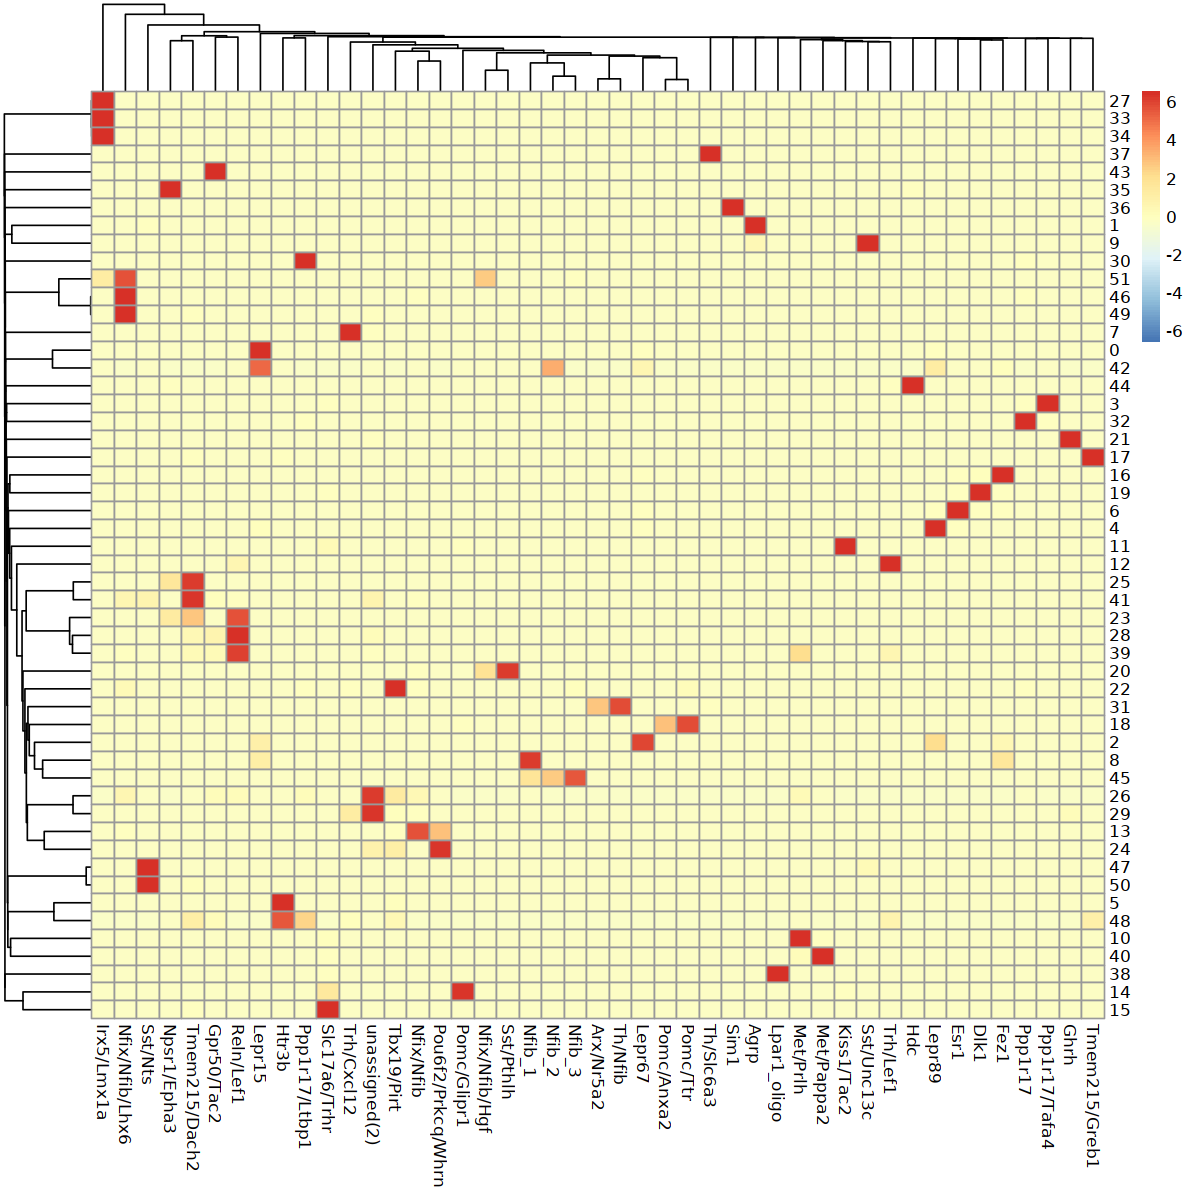

In [13]:
options(repr.plot.width=10, repr.plot.height=10)
freq_df = create_freq_df_per_cluster(obj, label_col='labels_lvl1')


library(pheatmap)
# Prepare the data (remove the first column that contains seurat_clusters names)
data_for_heatmap <- freq_df[,-1]

# Hierarchical clustering
row_dist <- dist(data_for_heatmap, method = "euclidean")
row_clust <- hclust(row_dist, method = "complete")

col_dist <- dist(t(data_for_heatmap), method = "euclidean")
col_clust <- hclust(col_dist, method = "complete")

# Plotting heatmap with dendrograms
pheatmap(data_for_heatmap, 
         cluster_rows = row_clust, 
         cluster_cols = col_clust,
         scale = "row",  # Scaling rows can be helpful for visualization
         show_rownames = TRUE,
         show_colnames = TRUE,
         labels_row = freq_df[,1] %>% pull) # Setting row labels


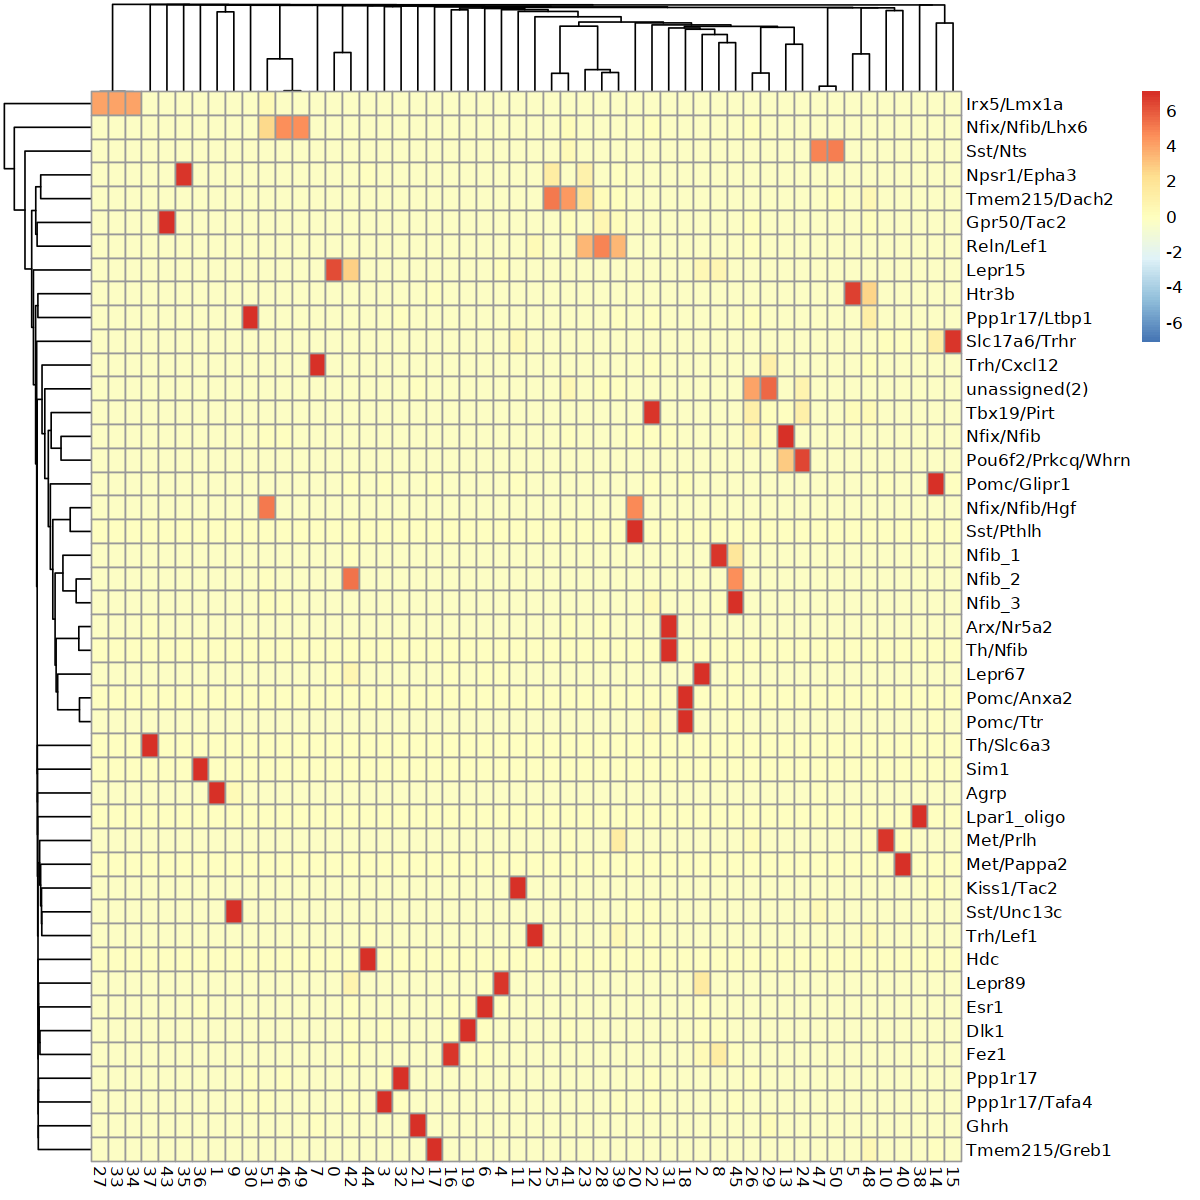

In [14]:
options(repr.plot.width=10, repr.plot.height=10)
freq_df = create_freq_df_per_label(obj, label_col='labels_lvl1')


library(pheatmap)
# Prepare the data (remove the first column that contains seurat_clusters names)
data_for_heatmap <- freq_df[,-1]

# Hierarchical clustering
row_dist <- dist(data_for_heatmap, method = "euclidean")
row_clust <- hclust(row_dist, method = "complete")

col_dist <- dist(t(data_for_heatmap), method = "euclidean")
col_clust <- hclust(col_dist, method = "complete")

# Plotting heatmap with dendrograms
pheatmap(data_for_heatmap, 
         cluster_rows = row_clust, 
         cluster_cols = col_clust,
         scale = "row",  # Scaling rows can be helpful for visualization
         show_rownames = TRUE,
         show_colnames = TRUE,
         labels_row = freq_df[,1] %>% pull) # Setting row labels


In [15]:
drop_these_cells = obj %>%
`[[` %>%
filter(!(seurat_clusters %in% c(51, 52, 53, 54, 55, 44, 20))) %>%
rownames

# drop_these_cells %>% qs::qsave('drop_these_cells.qs')

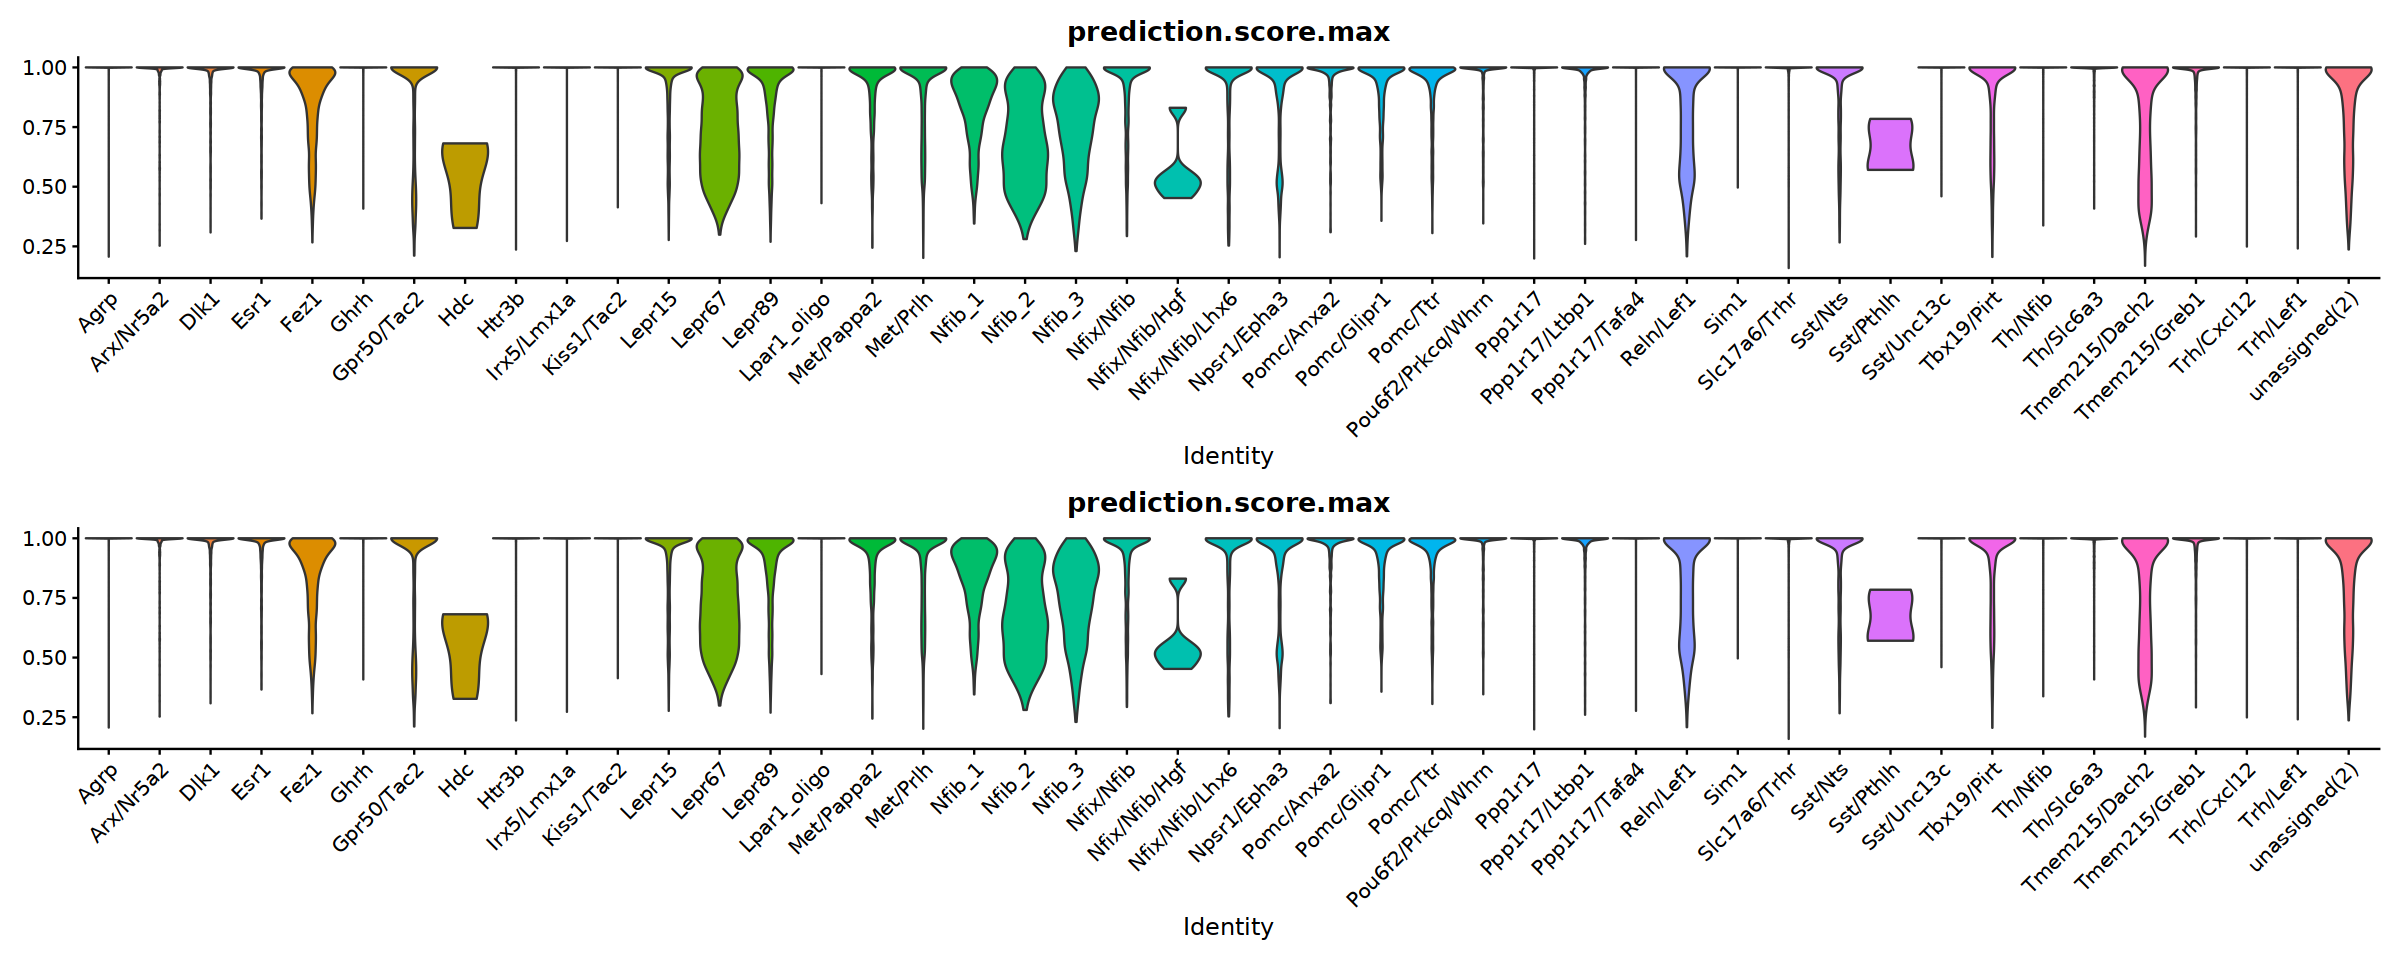

In [16]:
options(repr.plot.width=20, repr.plot.height=8)
p_vln1 = obj %>%
    subset(cells = drop_these_cells) %>%
    VlnPlot(features = "prediction.score.max", group.by = 'labels_lvl1',
           pt.size=0) + NoLegend()

p_vln2 = obj %>%
    subset(cells = drop_these_cells) %>%
    VlnPlot(features = "prediction.score.max", group.by = 'labels_lvl1',
           pt.size=0) + NoLegend()

p_vln1 / p_vln2

In [17]:
calculate_entropy <- function(set) {
  # Ensure 'input' is a vector
  if (!is.vector(set)) {
    stop("Input must be a vector.")
  }

  # Calculate frequencies/proportions of each item
  freq <- table(set) / length(set)

  # Compute entropy
  entropy <- -sum(freq * log(freq))

  # Normalize by the logarithm of the set size
  normalized_entropy <- entropy / log(length(set))

  return(normalized_entropy)
}


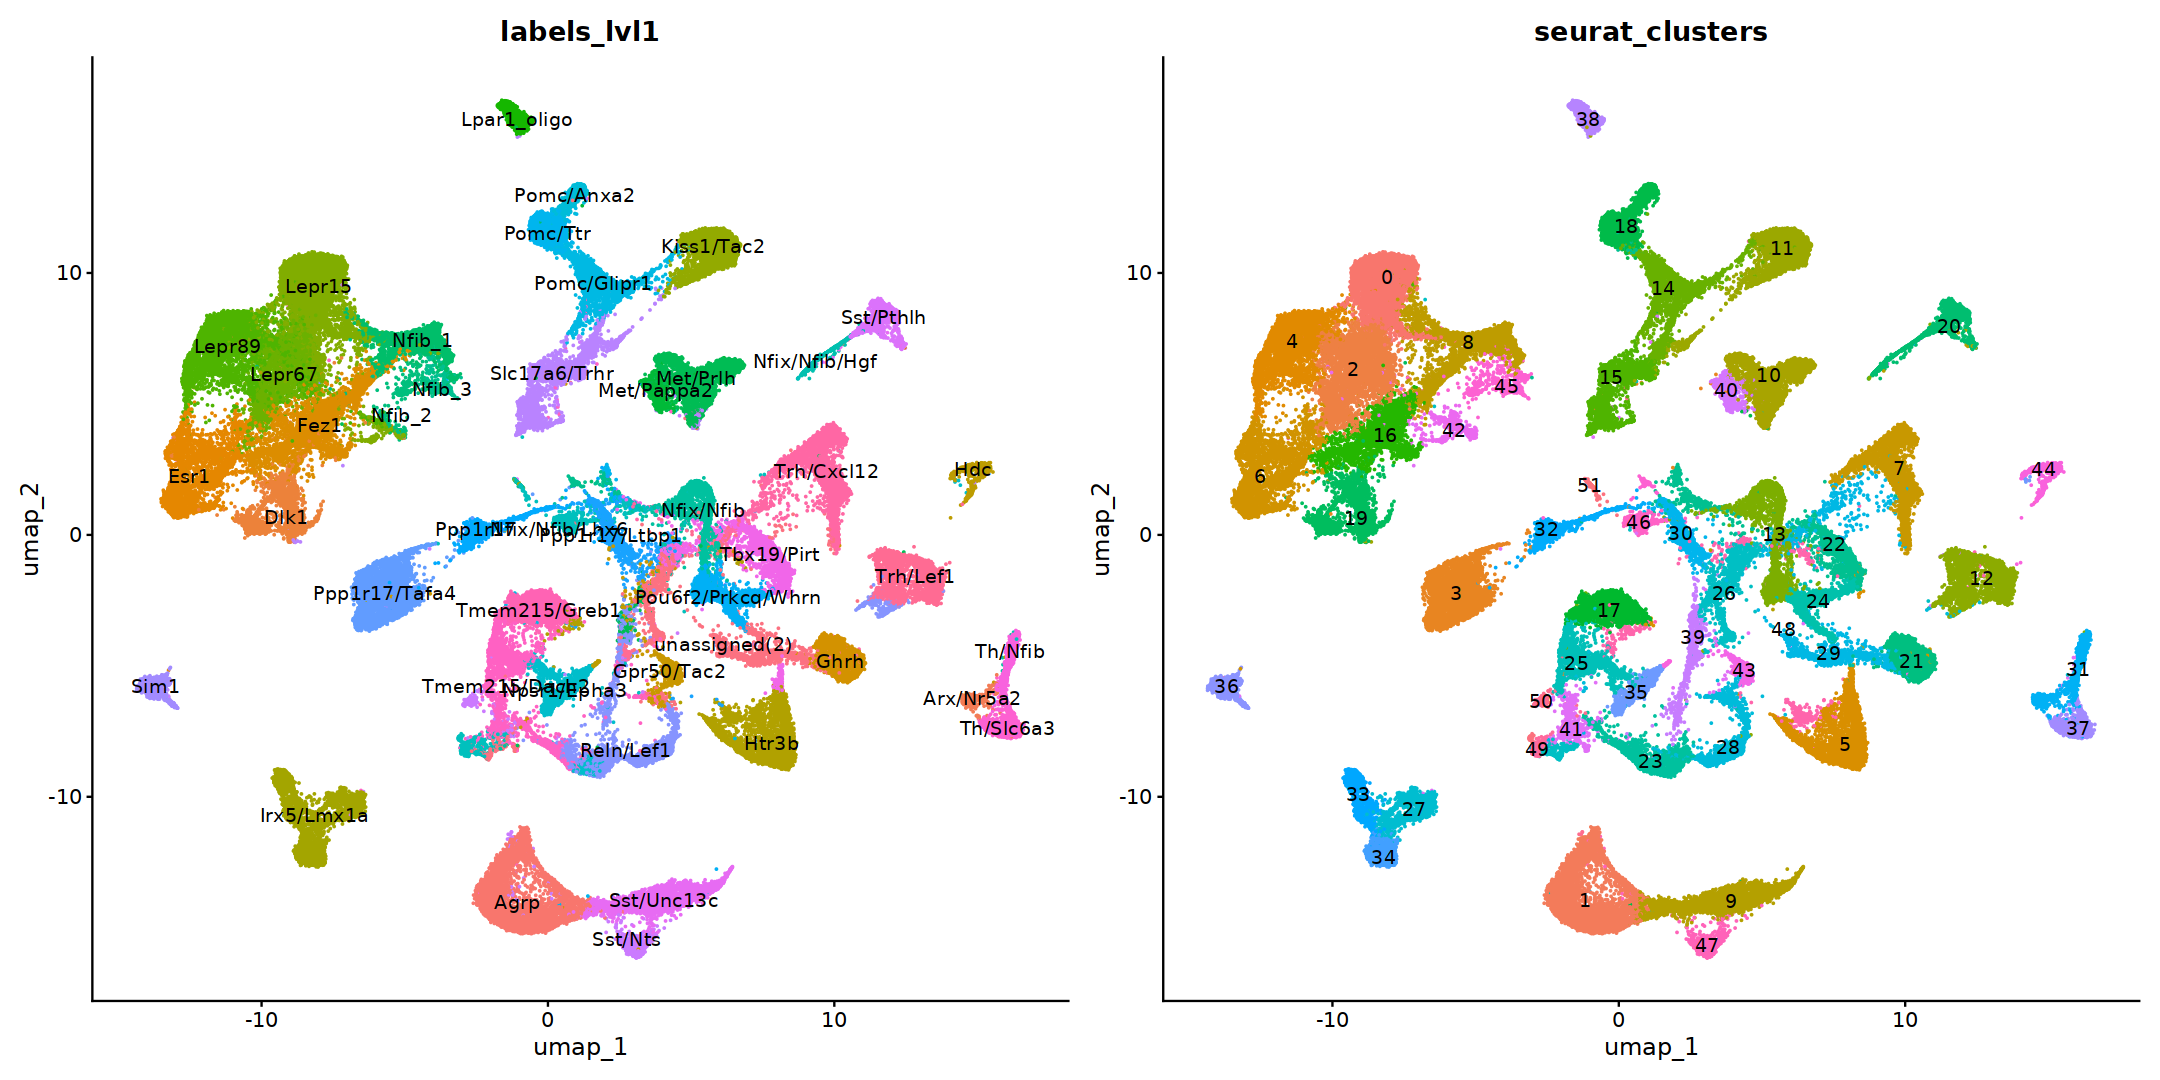

In [18]:
options(repr.plot.width=18, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters

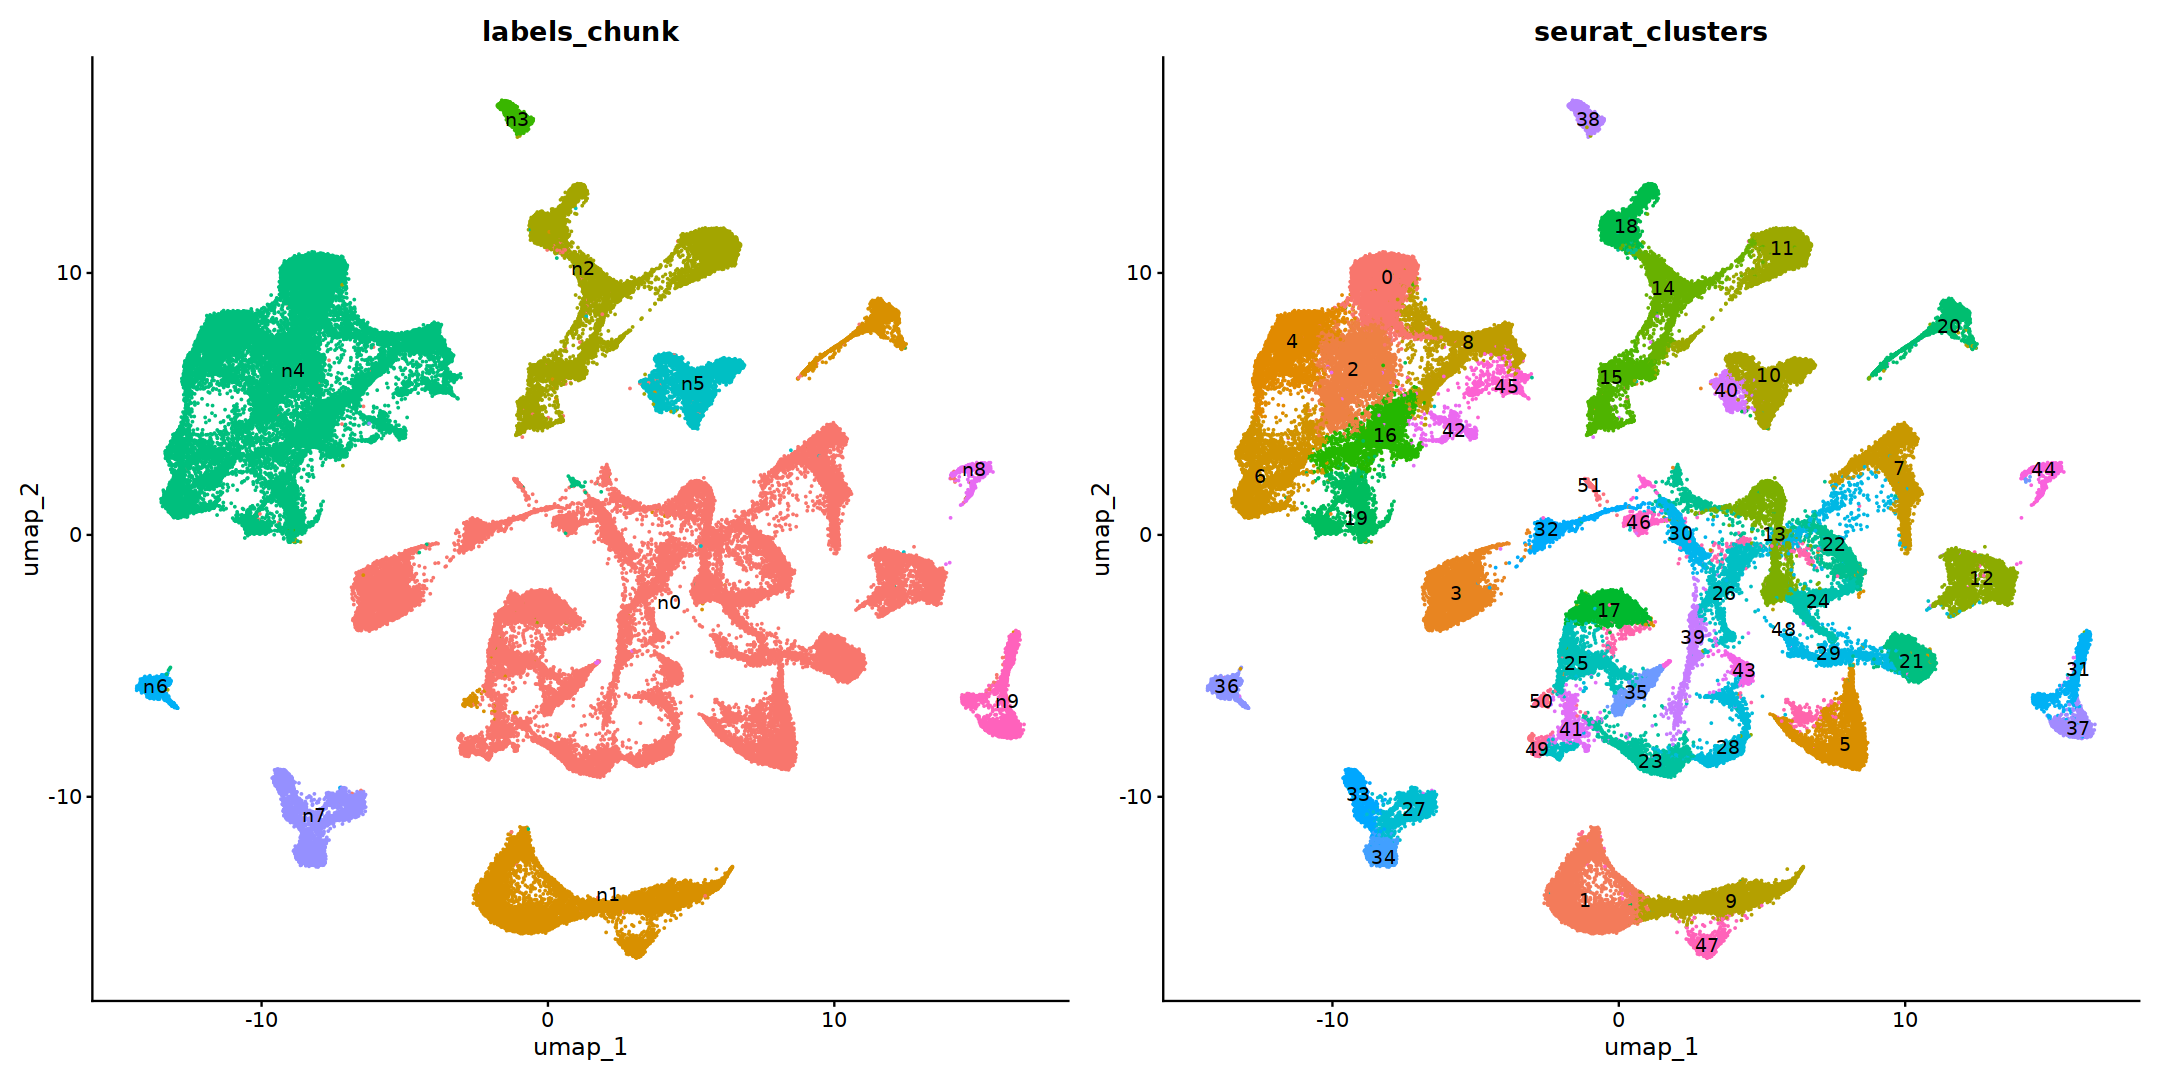

In [19]:
options(repr.plot.width=18, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_chunk', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters

In [41]:
labels_chunk = qs::qread('labels_chunk_neuron_v01.qs')

In [42]:
obj = obj %>% AddMetaData(labels_chunk)

In [45]:
obj %>% `[[` %>% colnames

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "nCount_RNA_SCOP"                   
 [5] "nFeature_RNA_SCOP"                  "Index.10x_SCOP"                    
 [7] "nCount_HTO_SCOP"                    "nFeature_HTO_SCOP"                 
 [9] "Index.HTO_SCOP"                     "nCount_spliced_SCOP"               
[11] "nFeature_spliced_SCOP"              "nCount_unspliced_SCOP"             
[13] "nFeature_unspliced_SCOP"            "HTO_mcl_maxID_SCOP"                
[15] "HTO_mcl_secondID_SCOP"              "HTO_mcl_margin_SCOP"               
[17] "HTO_mcl_classification_SCOP"        "HTO_mcl_classification.global_SCOP"
[19] "hash.mcl.ID_SCOP"                   "doublet_SCOP"                      
[21] "predicted_dub_std_SCOP"             "predicted_dub_cut_SCOP"            
[23] "barcode_SCOP"                       "Index.10x"                         
[25] "barcode"                            "strain"                            
[27] "treatment"                          "time"                              
[29] "collection_date"                    "isolation_date"                    
[31] "batch"                              "integrated_snn_res.0.5"            
[33] "seurat_clusters"                    "class"                             
[35] "integrated_snn_res.0.8"             "labels_lvl1_mg"                    
[37] "labels_lvl1"                        "prediction.score.max"              
[39] "labels_lvl2"                        "labels_chunk"

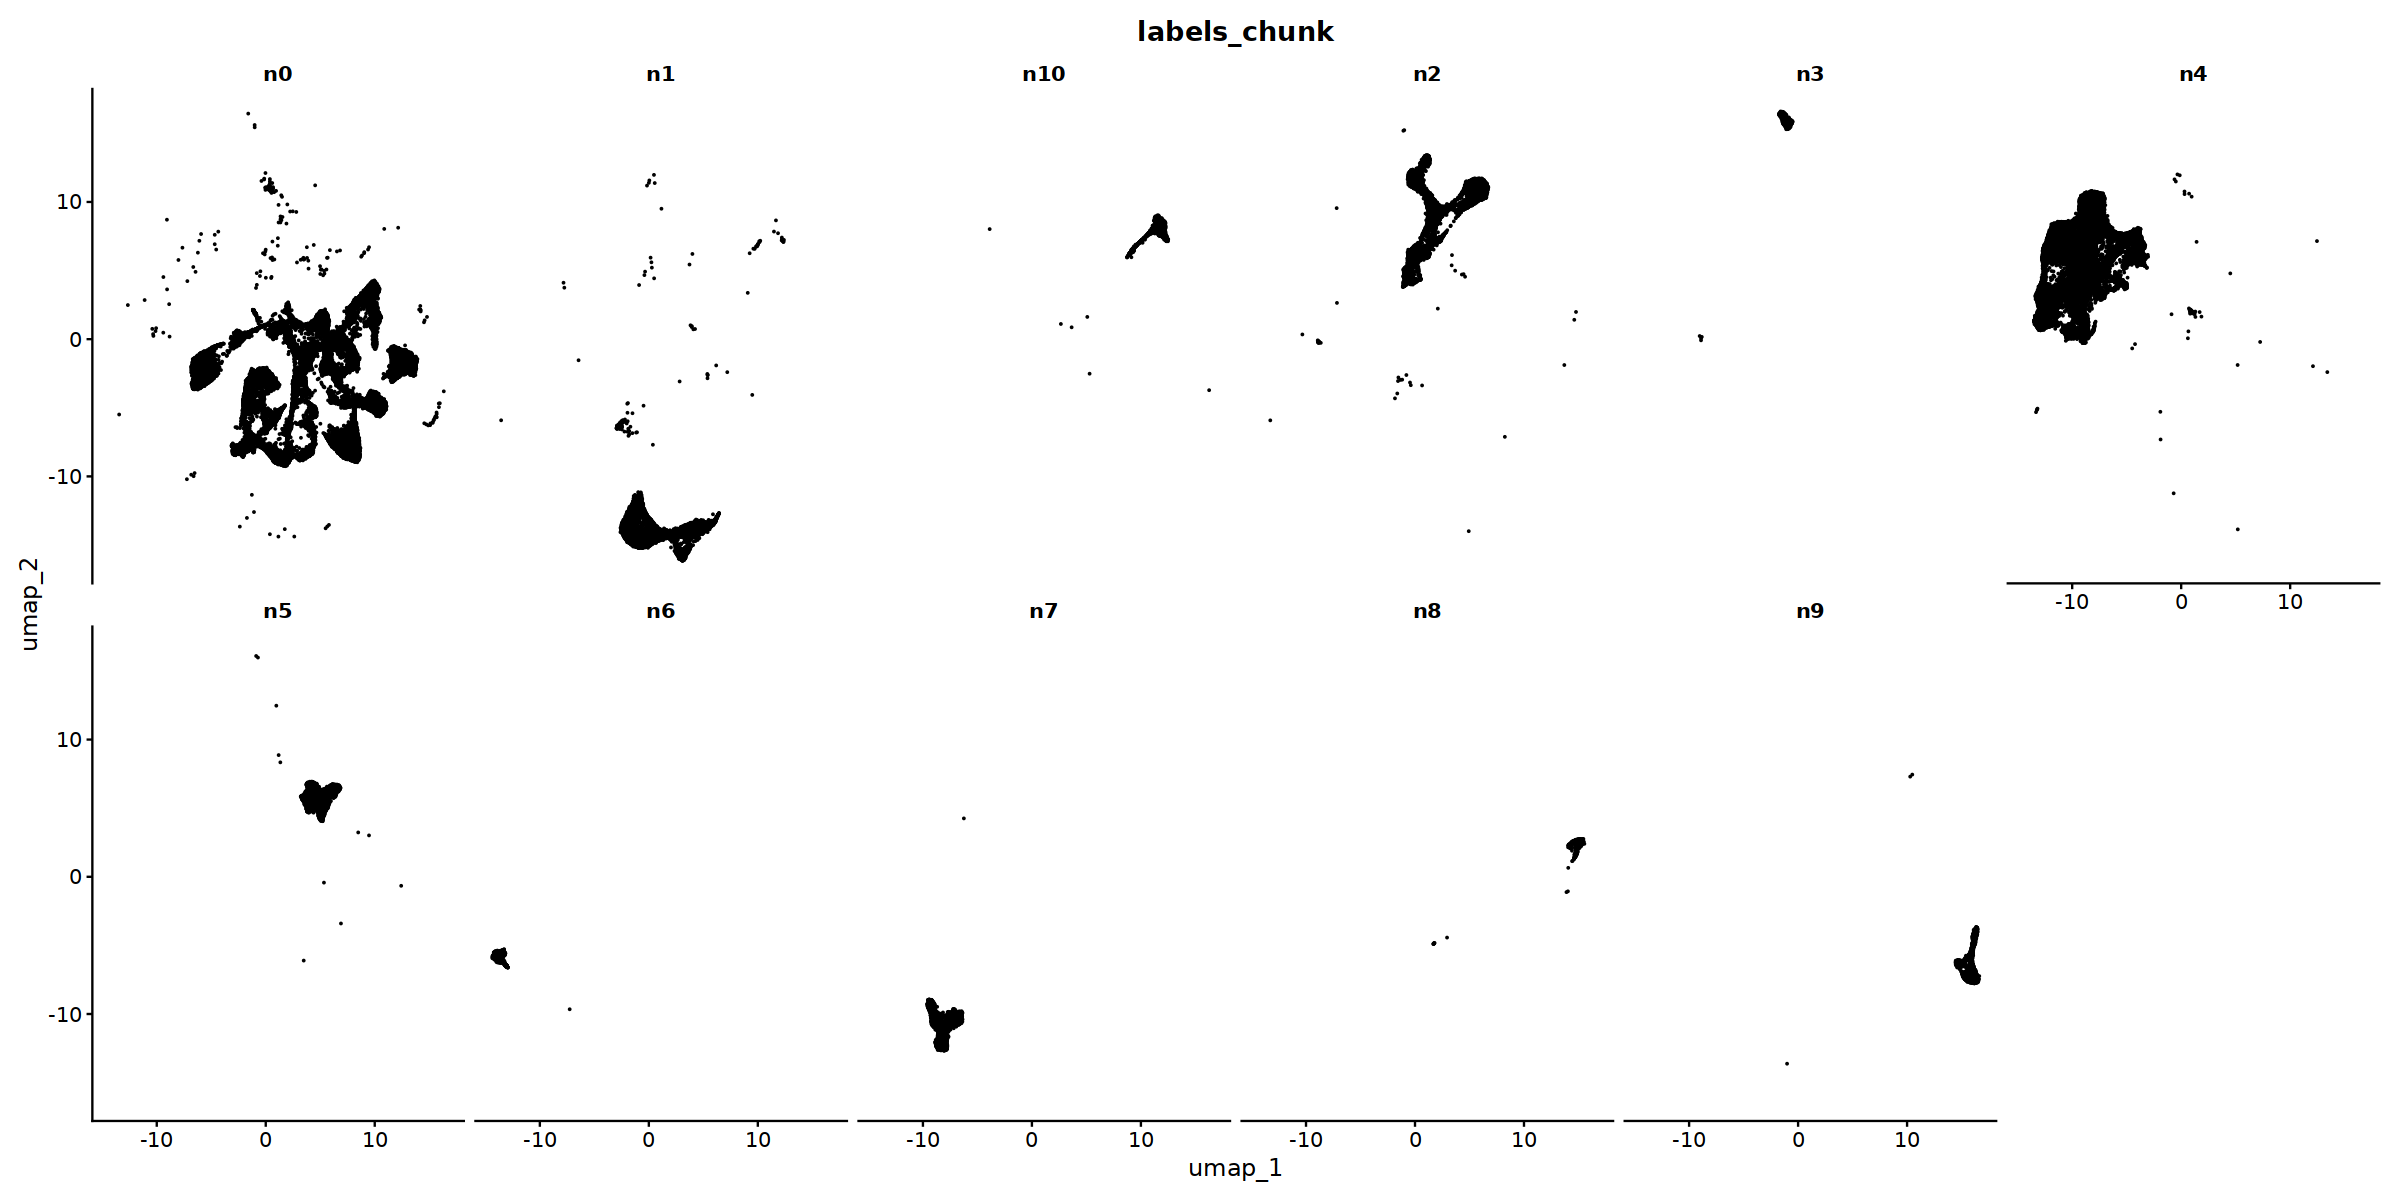

In [43]:
options(repr.plot.width=20, repr.plot.height=10)
DimPlot(obj, reduction = "umap", cols=rep('black', 58), dims=c(1,2), group.by='labels_chunk', label=F, split.by='labels_chunk', ncol=6) + NoLegend()

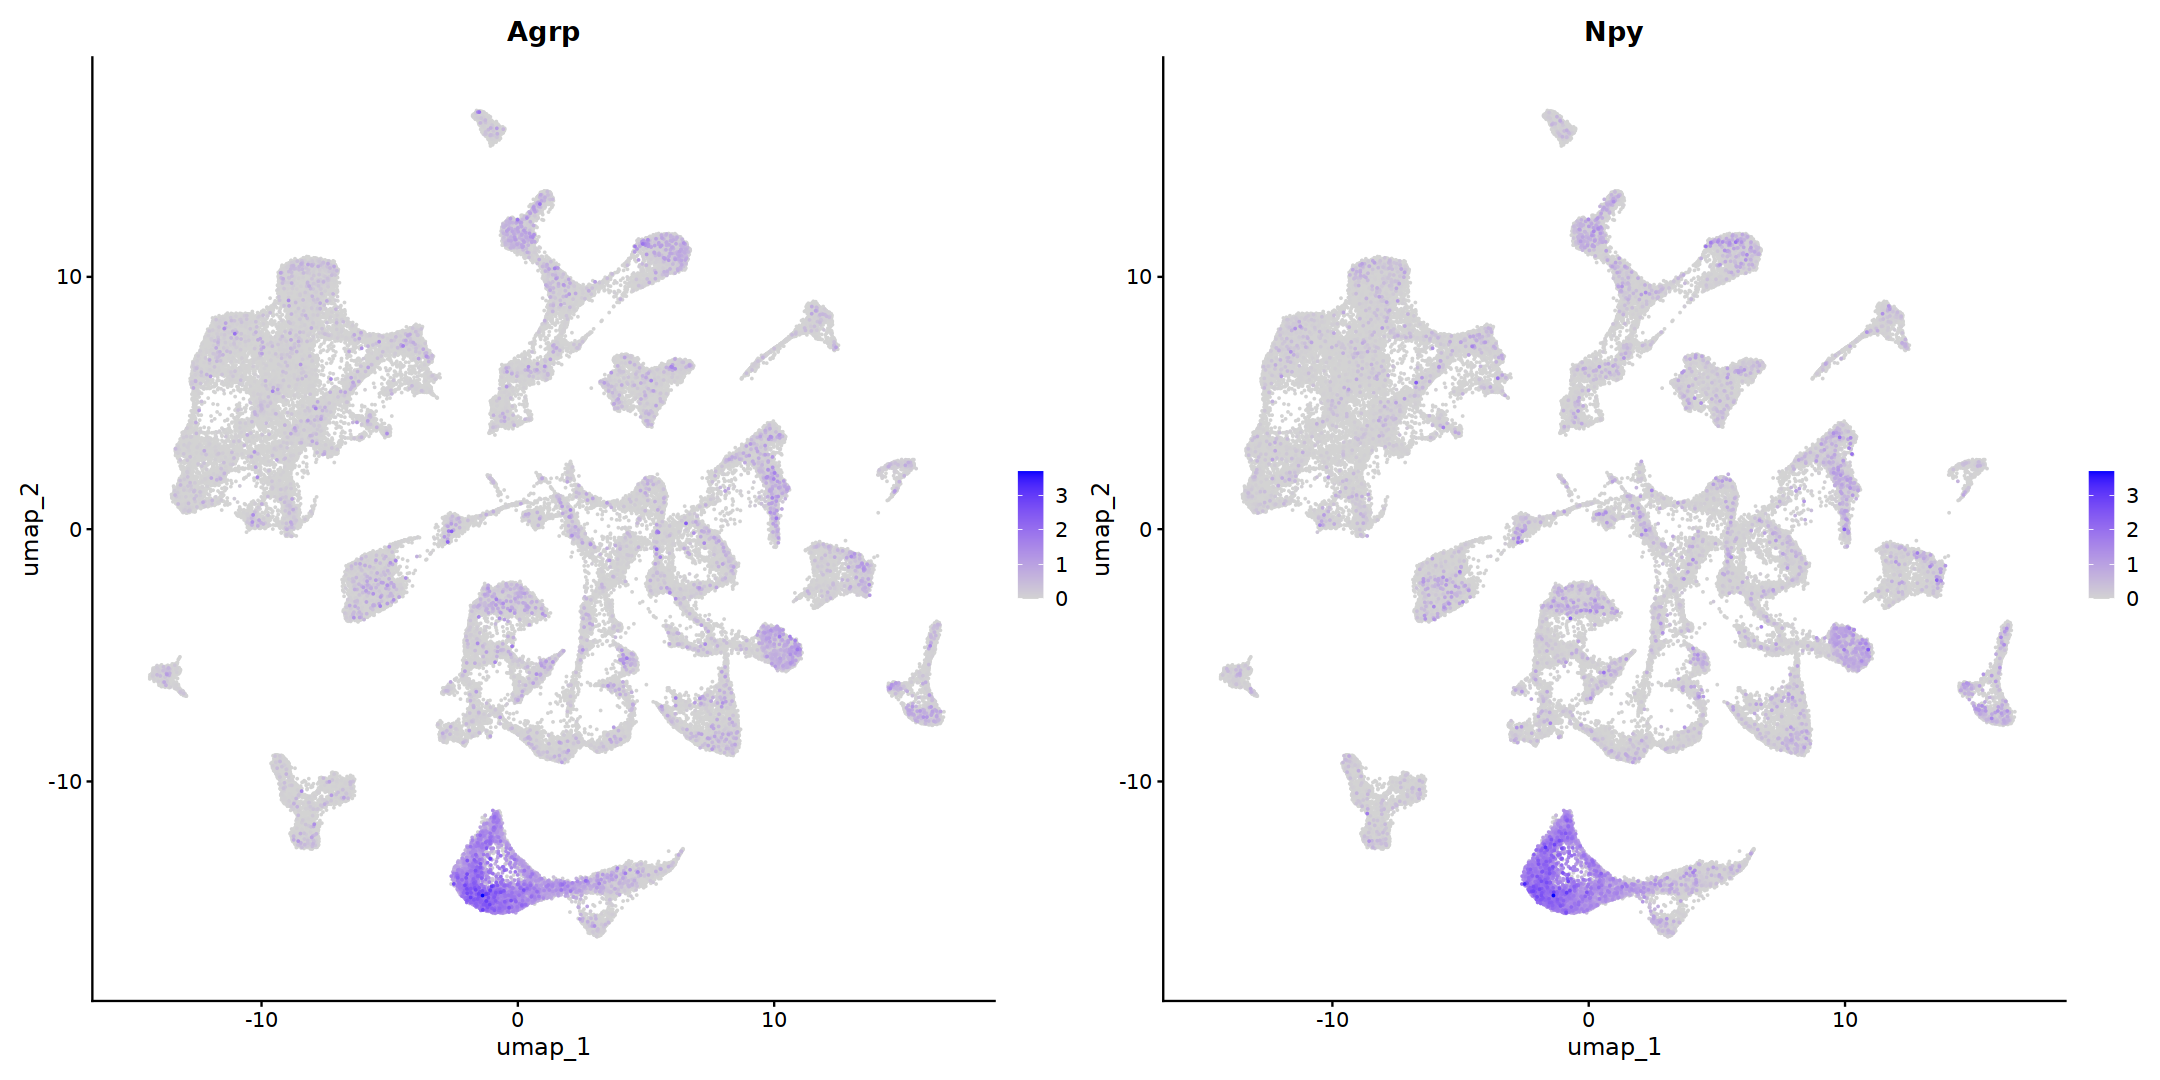

In [21]:
DefaultAssay(obj) = 'integrated'
options(repr.plot.width=18, repr.plot.height=9)
obj %>% FeaturePlot(features=c('Agrp', 'Npy'),slot = 'data',min.cutoff = 0, order =TRUE)

In [22]:
obj %>%
`[[` %>%
group_by(seurat_clusters) %>%
mutate(entropy = calculate_entropy(labels_lvl1)) %>%
select(seurat_clusters, entropy) %>%
distinct %>%
arrange(desc(entropy))

seurat_clusters entropy    
1  48              0.297785116
2  26              0.221298407
3  51              0.220414568
4  42              0.217473179
5  39              0.198726771
6  41              0.188120401
7  45              0.173509747
8  23              0.132860336
9  2               0.131622858
10 22              0.121984471
11 28              0.117722442
12 29              0.117637901
13 8               0.113274829
14 24              0.102928698
15 31              0.102791322
16 13              0.098588556
17 18              0.096737338
18 20              0.084779586
19 14              0.082275803
20 25              0.080854519
21 47              0.049673649
22 9               0.040668451
23 12              0.039544638
24 11              0.036940593
25 40              0.034360344
26 16              0.030762746
27 50              0.029598633
28 4               0.028630006
29 19              0.027174607
30 10              0.026934424
31 6               0.024268365
32 5               0.021848510
33 17              0.018490460
34 32              0.018424279
35 49              0.017902126
36 3               0.017488176
37 44              0.014769818
38 21              0.014329611
39 46              0.010697747
40 30              0.010166021
41 7               0.010020627
42 0               0.009949122
43 1               0.006594606
44 38              0.006506959
45 36              0.006170748
46 15              0.005678608
47 35              0.004665907
48 43              0.004329639
49 27              0.003014477
50 37              0.002041319
51 33              0.000000000
52 34              0.000000000

In [23]:
obj@assays$integrated$data %>% dim

[1]  2000 99080

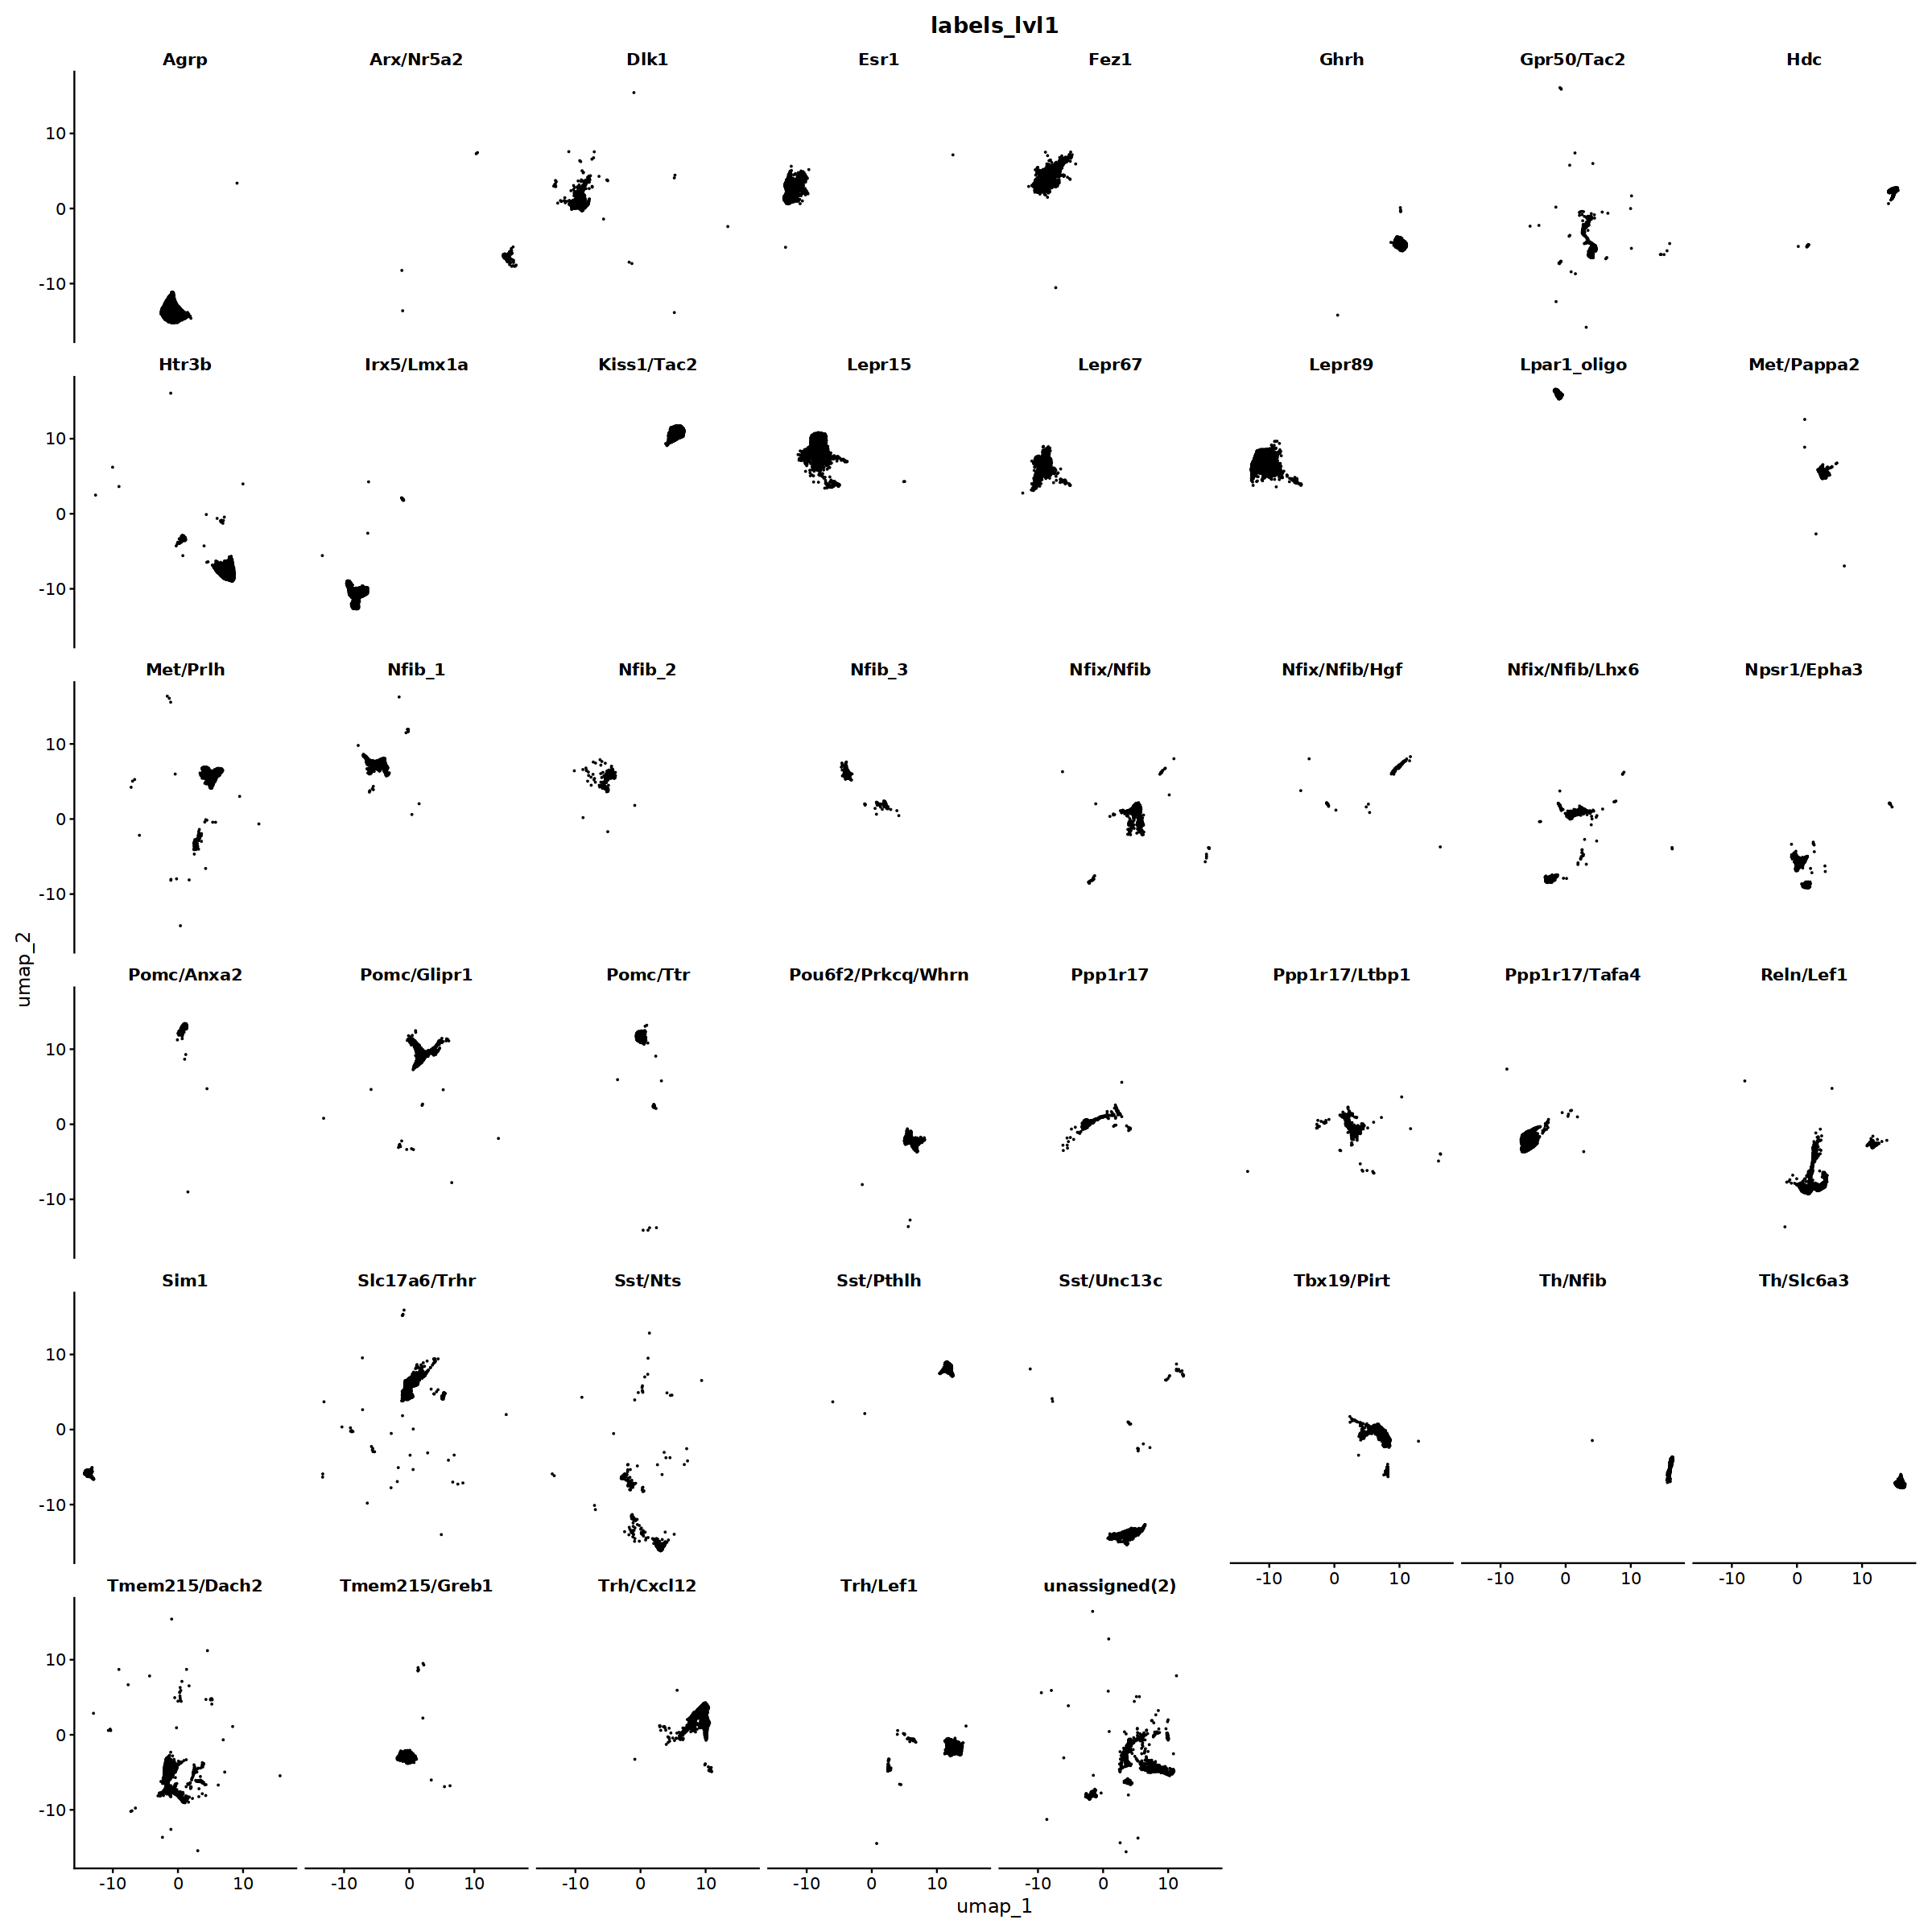

In [24]:
options(repr.plot.width=20, repr.plot.height=20)
DimPlot(obj, reduction = "umap", dims=c(1,2), cols=rep('black', 58), group.by='labels_lvl1', label=F, split.by='labels_lvl1', ncol=8) + NoLegend()

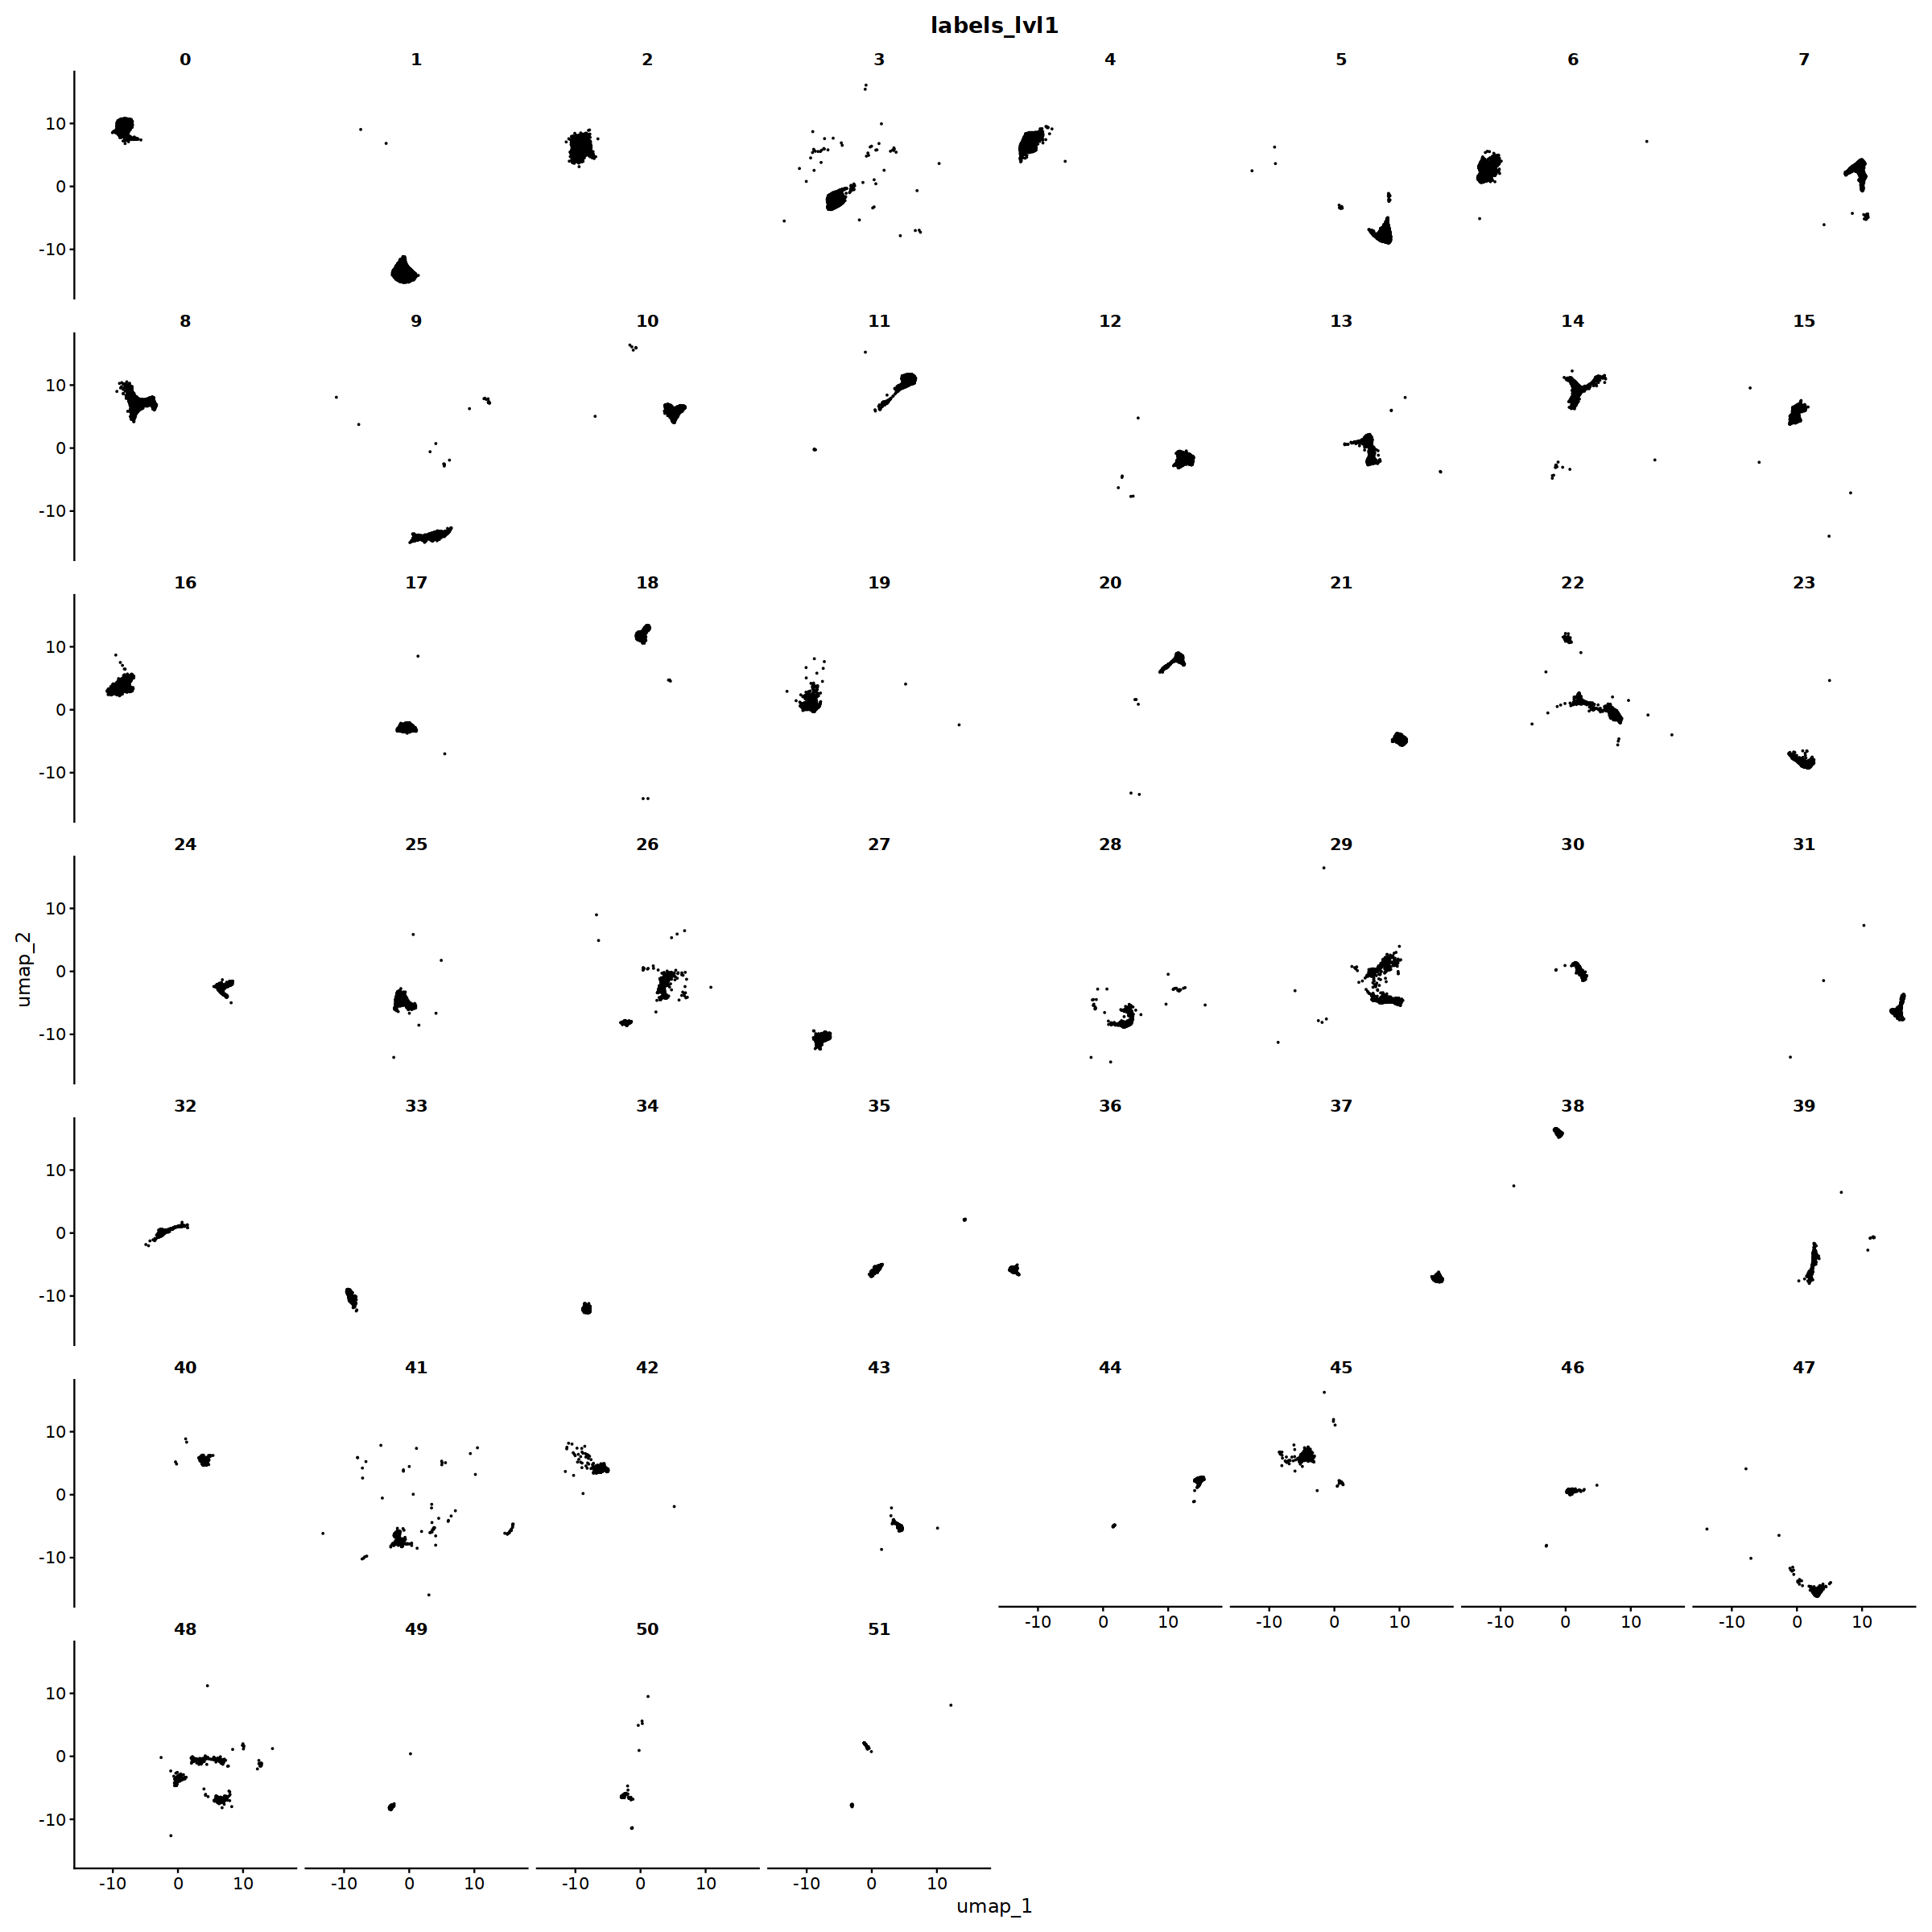

In [25]:
options(repr.plot.width=20, repr.plot.height=20)
DimPlot(obj, reduction = "umap", cols=rep('black', 58), dims=c(1,2), group.by='labels_lvl1', label=F, split.by='seurat_clusters', ncol=8) + NoLegend()

In [26]:
freq_df = create_freq_df_per_cluster(obj, label_col='labels_lvl1')
freq_df %>% head

seurat_clusters Agrp      Arx/Nr5a2 Dlk1         Esr1        Fez1       
1 0               0.0000000 0         0.0000000000 0.000000000 0.000000000
2 1               0.9910653 0         0.0000000000 0.000000000 0.000000000
3 2               0.0000000 0         0.0007320644 0.002928258 0.063933626
4 3               0.0000000 0         0.0009796718 0.000244918 0.001714426
5 4               0.0000000 0         0.0000000000 0.007275667 0.000000000
6 5               0.0000000 0         0.0003009329 0.000000000 0.000000000
  Ghrh         Gpr50/Tac2   Hdc Htr3b     ⋯ Sst/Pthlh Sst/Unc13c Tbx19/Pirt
1 0.0000000000 0.0000000000 0   0.0000000 ⋯ 0         0          0.00000000
2 0.0002290951 0.0002290951 0   0.0000000 ⋯ 0         0          0.00000000
3 0.0000000000 0.0000000000 0   0.0000000 ⋯ 0         0          0.00000000
4 0.0000000000 0.0009796718 0   0.0000000 ⋯ 0         0          0.00000000
5 0.0000000000 0.0000000000 0   0.0000000 ⋯ 0         0          0.00000000
6 0.0000000000 0.0000000000 0   0.9587722 ⋯ 0         0          0.04032501
  Th/Nfib Th/Slc6a3 Tmem215/Dach2 Tmem215/Greb1 Trh/Cxcl12 Trh/Lef1
1 0       0         0.0000000000  0.0000000000  0          0       
2 0       0         0.0000000000  0.0000000000  0          0       
3 0       0         0.0002440215  0.0000000000  0          0       
4 0       0         0.0009796718  0.0000000000  0          0       
5 0       0         0.0000000000  0.0000000000  0          0       
6 0       0         0.0000000000  0.0003009329  0          0       
  unassigned(2)
1 0.000000000  
2 0.000000000  
3 0.000000000  
4 0.000244918  
5 0.000000000  
6 0.000000000

In [29]:
source('../../00_cellbender/cellbender_preprocess.R')

In [30]:
blah_obj = obj %>% prepend_obj_labels(label_col = 'labels_lvl1', 'blah_')
blah_obj

An object of class Seurat 
29034 features across 99080 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [32]:
blah_obj %>% `[[` %>% distinct(labels)

labels                
SI-TT-A11_AAACCCAAGGTGGTTG blah_Sst/Pthlh        
SI-TT-A11_AAACCCACATACAGCT blah_Nfix/Nfib        
SI-TT-A11_AAACCCAGTACGTTCA blah_Agrp             
SI-TT-A11_AAACCCATCCAAGCAT blah_Sim1             
SI-TT-A11_AAACCCATCCCATAAG blah_Fez1             
SI-TT-A11_AAACCCATCGTCCTCA blah_Pou6f2/Prkcq/Whrn
SI-TT-A11_AAACGAAAGAACTGAT blah_Dlk1             
SI-TT-A11_AAACGAAAGCCGTAAG blah_Slc17a6/Trhr     
SI-TT-A11_AAACGAACAGTATGAA blah_Esr1             
SI-TT-A11_AAACGAACATGACGAG blah_Tmem215/Dach2    
SI-TT-A11_AAACGAAGTGCCGTTG blah_Sst/Nts          
SI-TT-A11_AAACGCTCACTATGTG blah_Sst/Unc13c       
SI-TT-A11_AAACGCTCAGATCACT blah_Irx5/Lmx1a       
SI-TT-A11_AAACGCTGTTCGGTAT blah_Htr3b            
SI-TT-A11_AAAGAACAGAGTATAC blah_Hdc              
SI-TT-A11_AAAGAACAGATAGTCA blah_Lepr89           
SI-TT-A11_AAAGAACAGCCTCTCT blah_Nfib_1           
SI-TT-A11_AAAGAACCAGACTCTA blah_Ppp1r17/Tafa4    
SI-TT-A11_AAAGAACCATGACTTG blah_Lepr67           
SI-TT-A11_AAAGAACGTCGCATGC blah_Lepr15           
SI-TT-A11_AAAGGATAGCTTCATG blah_Arx/Nr5a2        
SI-TT-A11_AAAGGATAGTTTCAGC blah_Kiss1/Tac2       
SI-TT-A11_AAAGGATCAATACAGA blah_Met/Prlh         
SI-TT-A11_AAAGGATCAGGCGAAT blah_Met/Pappa2       
SI-TT-A11_AAAGGATGTCTCACAA blah_Trh/Lef1         
SI-TT-A11_AAAGGATGTTTCGACA blah_Gpr50/Tac2       
SI-TT-A11_AAAGGATTCGTACCTC blah_Tmem215/Greb1    
SI-TT-A11_AAAGGATTCTGGGCGT blah_Ghrh             
SI-TT-A11_AAAGGGCAGATGGTAT blah_unassigned(2)    
SI-TT-A11_AAAGGTAGTTCTGAGT blah_Pomc/Ttr         
SI-TT-A11_AAAGTCCTCACCCATC blah_Tbx19/Pirt       
SI-TT-A11_AAAGTGAAGCTAGCCC blah_Pomc/Glipr1      
SI-TT-A11_AAAGTGAGTTCGCGTG blah_Pomc/Anxa2       
SI-TT-A11_AAAGTGATCTTCGGAA blah_Npsr1/Epha3      
SI-TT-A11_AAATGGAAGACCATTC blah_Trh/Cxcl12       
SI-TT-A11_AACAAAGAGCGTGCTC blah_Nfib_2           
SI-TT-A11_AACAACCGTACCTGTA blah_Reln/Lef1        
SI-TT-A11_AACCAACAGTAAAGCT blah_Th/Nfib          
SI-TT-A11_AACCACAGTATAGCTC blah_Ppp1r17          
SI-TT-A11_AACGGGACAAAGCAAT blah_Nfix/Nfib/Lhx6   
SI-TT-A11_AACGGGAGTGGCTGAA blah_Th/Slc6a3        
SI-TT-A11_AAGCATCCAGTTTCAG blah_Nfib_3           
SI-TT-A11_AAGTCGTGTGGTCCCA blah_Ppp1r17/Ltbp1    
SI-TT-A11_ACAGAAACATCCGGCA blah_Lpar1_oligo      
SI-TT-A11_ACCTGAAGTACAGTTC blah_Nfix/Nfib/Hgf